#  Introduction to Seaborn

Seaborn provides a high-level interface to Matplotlib, a powerful but sometimes unwieldy Python visualization library.

On Seaborn’s official website, they state:

#### If matplotlib “tries to make easy things easy and hard things possible”, seaborn tries to make a well-defined set of hard things easy too.

However, Seaborn is a complement, not a substitute, for Matplotlib. There are some tweaks that still require Matplotlib.

In [11]:
# Pandas for managing datasets
import pandas as pd

# Matplotlib for additional customization
from matplotlib import pyplot as plt

# Seaborn for plotting and styling
import seaborn as sns

In [41]:
df = pd.read_csv('abc.txt', encoding= 'unicode_escape',index_col=0)

In [42]:
df.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Stage,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,2,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,3,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,2,False


###  Seaborn's plotting functions.

One of Seaborn's greatest strengths is its diversity of plotting functions. For instance, making a scatter plot is just one line of code using the lmplot() function.

D:\New folder (3)\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


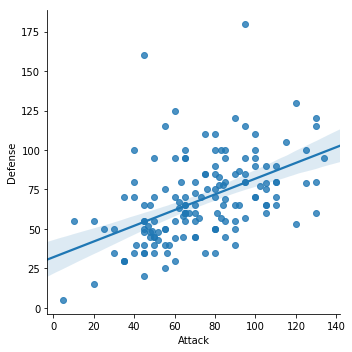

In [45]:
# Recommended way
sns.lmplot(x='Attack', y='Defense', data=df)
#By the way, Seaborn doesn't have a dedicated scatter plot function, which is why you see a diagonal line.
#We actually used Seaborn's function for fitting and plotting a regression line.

####  First, we'll set fit_reg=False to remove the regression line, since we only want a scatter plot.

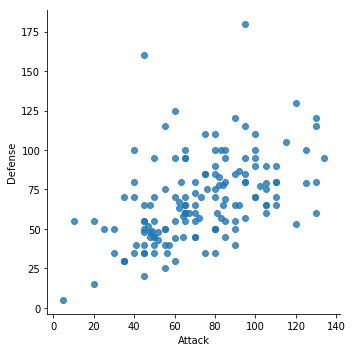

In [47]:
sns.lmplot(x='Attack',y='Defense',data=df,fit_reg=False)

###  In seaborn, the hue parameter determines which column in the data frame should be used for colour encoding. Using the official document for lmplot provided an example for this. Adding `hue="smoker" tells seaborn you want to colour the data points for smoker and non-smoker differently

#### Then, we'll set hue='Stage' to color our points by the Pokémon's evolution stage. This hue argument is very useful because it allows you to express a third dimension of information using color.

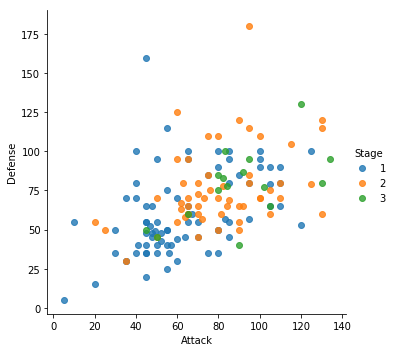

In [51]:
sns.lmplot(x='Attack',y='Defense',data=df,fit_reg=False,hue='Stage')

(1, 141.9881096001028)

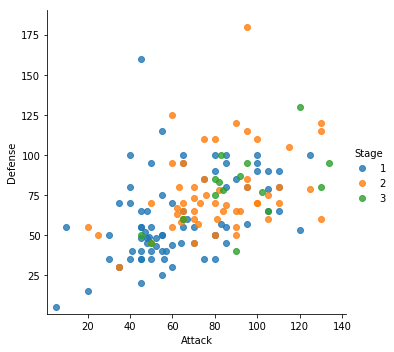

In [55]:
#Setting your axes limits is one of those times, but the process is pretty simple:

#First, invoke your Seaborn plotting function as normal.
#Then, invoke Matplotlib's customization functions. In this case, we'll use its ylim() and xlim() functions.
sns.lmplot(x='Attack',y='Defense',data=df,fit_reg=False,hue='Stage')
plt.ylim(1)
plt.xlim(1)

###  The role of Pandas.

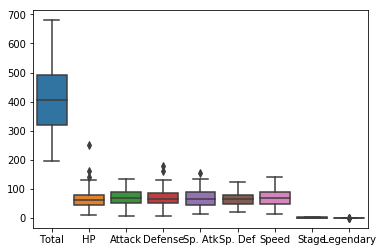

In [56]:
#Even though this is a Seaborn tutorial, Pandas actually plays a very important role
# For example, let's say we wanted to make a box plot for our Pokémon's combat stats:
sns.boxplot(data=df)

But there are some columns we'd probably like to remove:

We can remove the Total since we have individual stats.
We can remove the Stage and Legendary columns because they aren't combat stats.

In turns out that this isn't easy to do within Seaborn alone. Instead, it's much simpler to pre-format your DataFrame.

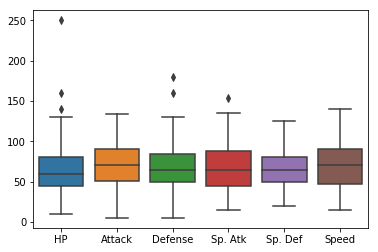

In [59]:
stats_df = df.drop(['Total', 'Stage', 'Legendary'], axis=1)
sns.boxplot(data = stats_df)

###  Seaborn themes.
Another advantage of Seaborn is that it comes with decent style themes right out of the box. The default theme is called 'darkgrid'.
we'll change the theme to 'whitegrid' while making a violin plot.

#### Violin plots are useful alternatives to box plots.They show the distribution (through the thickness of the violin) instead of only the summary statistics.

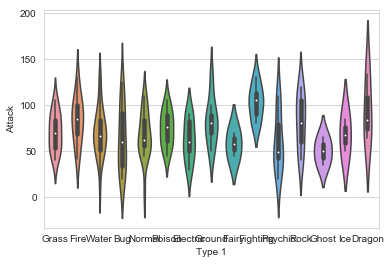

In [65]:
sns.set_style('whitegrid')
sns.violinplot(x='Type 1',y='Attack',data=df)

Now, Pokémon fans might find something quite jarring about that plot: The colors are nonsensical. Why is the Grass type colored pink or the Water type colored orange? We must fix this!

Fortunately, Seaborn allows us to set custom color palettes. We can simply create an ordered Python list of color hex values.

In [66]:
pkmn_type_colors = ['#78C850',  # Grass
                    '#F08030',  # Fire
                    '#6890F0',  # Water
                    '#A8B820',  # Bug
                    '#A8A878',  # Normal
                    '#A040A0',  # Poison
                    '#F8D030',  # Electric
                    '#E0C068',  # Ground
                    '#EE99AC',  # Fairy
                    '#C03028',  # Fighting
                    '#F85888',  # Psychic
                    '#B8A038',  # Rock
                    '#705898',  # Ghost
                    '#98D8D8',  # Ice
                    '#7038F8',  # Dragon
                   ]

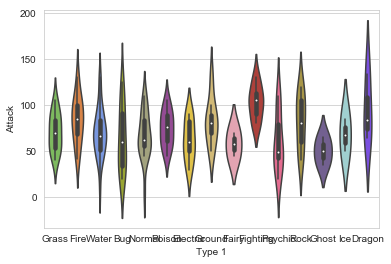

In [67]:
# Violin plot with Pokemon color palette
sns.violinplot(x='Type 1', y='Attack', data=df, 
               palette=pkmn_type_colors) # Set color palette

Violin plots are great for visualizing distributions. However, since we only have 151 Pokémon in our dataset, we may want to simply display each point.

That's where the swarm plot comes in. This visualization will show each point, while "stacking" those with similar values:

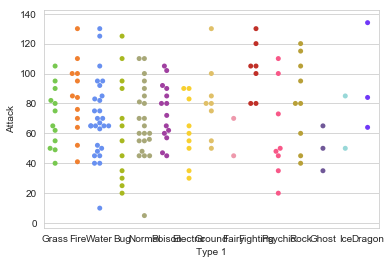

In [68]:
# Swarm plot with Pokemon color palette
sns.swarmplot(x='Type 1', y='Attack', data=df, 
              palette=pkmn_type_colors)

That's handy, but can't we combine our swarm plot and the violin plot? After all, they display similar information, right?

Overlaying plots.
The answer is yes.

It's pretty straightforward to overlay plots using Seaborn, and it works the same way as with Matplotlib. Here's what we'll do:

First, we'll make our figure larger using Matplotlib.
Then, we'll plot the violin plot. However, we'll set inner=None to remove the bars inside the violins.
Next, we'll plot the swarm plot. This time, we'll make the points black so they pop out more.
Finally, we'll set a title using Matplotlib.

Text(0.5, 1.0, 'Attack by Type')

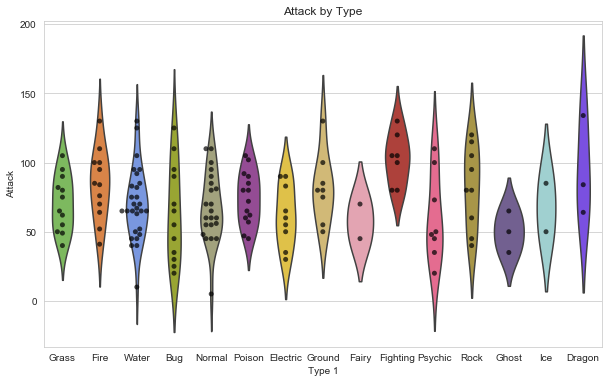

In [70]:
# Set figure size with matplotlib
plt.figure(figsize=(10,6))
 
# Create plot
sns.violinplot(x='Type 1',
               y='Attack', 
               data=df, 
               inner=None, # Remove the bars inside the violins
               palette=pkmn_type_colors)
 
sns.swarmplot(x='Type 1', 
              y='Attack', 
              data=df, 
              color='k', # Make points black
              alpha=0.7) # and slightly transparent
 
# Set title with matplotlib
plt.title('Attack by Type')